In [139]:
# imports
import time, os, numpy as np
import pandas as pd, datetime as dt
import dateutil.relativedelta as reladelt

import plotly.express as px, plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import matplotlib.pyplot as plt

# from sklearn.pipeline import Pipeline

from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.sarimax import SARIMAX

from sktime.forecasting.compose import ForecastingPipeline
from sktime.transformations.series.impute import Imputer
from sktime.transformations.series.adapt import TabularToSeriesAdaptor
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sklearn.preprocessing import MinMaxScaler


In [14]:
# list article titles for querying api
article_pairs = [
    ('Rwanda', 'Rwanda'),
    ('Paul_Kagame', 'Paul_Kagame'),
    ('Umuganda', 'Umuganda'),
    ('Uburezi_mu_Rwanda', 'Education_in_Rwanda'),
    ('Kigali', 'Kigali'),
    ('Ubukungu_bw%27U_Rwanda', 'Economy_of_Rwanda'),
    ('Ikinyarwanda', 'Kinyarwanda'),
    ('Rose_Kabuye', 'Rose_Kabuye'),
    ('Louise_Mushikiwabo', 'Louise_Mushikiwabo'),
    ('Agnes_Binagwaho', 'Agnes_Binagwaho'),
    ('Paul_Rusesabagina', 'Paul_Rusesabagina')
]
rw_articles = [i for i,j in article_pairs]
en_articles = [j for i,j in article_pairs]
article_tups = [('rw', i) for i in rw_articles] + [('en', i) for i in en_articles]
article_idx = pd.Index(article_tups)

# read_csv the time series and rearrange multiindex
panel = pd.read_csv('pageview_table.csv', header=[0,1], skipinitialspace=True, index_col=0)
l = []
num_articles = panel.shape[1]//2
for i in range(num_articles*2):
    article_num = i % num_articles
    l.append((article_num, article_tups[i][0], article_tups[i][1]))
panel.columns = pd.Index(l)
panel.sort_index(axis=1, level=[0,1], inplace=True)

# prep the Paul_Kagame pageviews for plotting
pk = panel[0]
pk = pk.droplevel(1,axis=1)

In [140]:
# en
days = pk.shape[0]
tr_nobs = 730
preds = pd.Series(np.nan, index=pk.index)
for i in range(8, days - tr_nobs):
    period_tr = pd.PeriodIndex(pk_tr.index, freq='D')
    y_tr = pk.iloc[i: i+tr_nobs].en    # only using en as the y for now
    y_fh = pk.iloc[i+tr_nobs: i+tr_nobs+1].en
    X_tr = pk.iloc[i-1: i+tr_nobs-1].rw   # X is lagged 1 day  not yet, need to use shift
    X_fh = pk.iloc[i+tr_nobs-1: i+tr_nobs].rw
    
    d = {'y_tr':y_tr, 'y_fh':y_te, 'X_tr':X_tr, 'X_te':X_te}
    for j in d:
        period_idx = pd.PeriodIndex(d[j].index, freq='D')
        d[j] = pd.Series(d[j].tolist(), index=period_idx)
    
    idx_te = pd.PeriodIndex(yfh.index, freq='D')
    fh = ForecastingHorizon(fh_period_idx, is_relative=False)
    

Index(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
       '2017-01-06', '2017-01-07', '2017-01-08', '2017-01-09', '2017-01-10',
       ...
       '2022-05-29', '2022-05-30', '2022-05-31', '2022-06-01', '2022-06-02',
       '2022-06-03', '2022-06-04', '2022-06-05', '2022-06-06', '2022-06-07'],
      dtype='object', length=1984)

In [104]:
y.shape, pk.shape

((1984,), (1984, 2))

In [ ]:
# step 1: get y
nobs_tr = int(pk.shape[0]//1.05)
ytr = pk.en.iloc[:nobs_tr]
ytr_period_idx = pd.PeriodIndex(ytr.index, freq='D')
y = pd.Series(pk.en[:nobs_tr].tolist(), index=ytr_period_idx)

# step 2: specifying forecasting horizon
# fh_period_idx = pd.PeriodIndex(pk.index, freq='D')
yfh = pk.en.iloc[nobs_tr:nobs_tr+1]
fh_period_idx = pd.PeriodIndex(yfh.index, freq='D')
fh = ForecastingHorizon(fh_period_idx, is_relative=False)
fh

# step 3: specifying the forecasting algorithm
# forecaster = NaiveForecaster(strategy="last", sp=12)
forecaster = (
    order=(1, 0, 2), trend=None, enforce_stationarity=False
)

# step 4: fitting the forecaster
forecaster.fit(y)

# step 5: querying predictions
y_pred = forecaster.predict(fh)

In [132]:
y_pred = forecaster.predict(fh)

In [137]:
y_pred, y

(2022-03-05    3632.072068
 Freq: D, dtype: float64,
 2017-01-01    2711.0
 2017-01-02    2911.0
 2017-01-03    3292.0
 2017-01-04    2909.0
 2017-01-05    2930.0
                ...  
 2022-02-28    3686.0
 2022-03-01    3924.0
 2022-03-02    3847.0
 2022-03-03    3705.0
 2022-03-04    3382.0
 Freq: D, Length: 1889, dtype: float64)

In [133]:
y_pred.shape, y.shape

((1,), (1889,))

In [ ]:
y_pred.plot()

<AxesSubplot:>

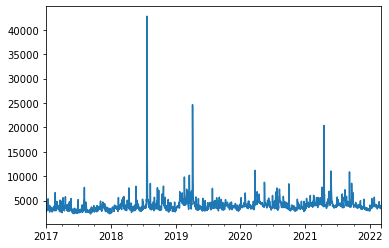

In [135]:
y.plot()